Baseline Model for Building Destruction Classification

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


We start by reading data in from the cal_fire_data_train and cal_fire_data_test CSV files:

In [16]:
fire_train = pd.read_csv("../data/cal_fire_data_train.csv")
fire_test = pd.read_csv("../data/cal_fire_data_test.csv")
print(fire_train.info())
print(fire_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Incident Name                              26874 non-null  object 
 1   * Structure Type                             26874 non-null  object 
 2   * Roof Construction                          26874 non-null  object 
 3   * Eaves                                      26874 non-null  object 
 4   * Vent Screen                                26874 non-null  object 
 5   * Exterior Siding                            26874 non-null  object 
 6   * Window Pane                                26874 non-null  object 
 7   * Deck/Porch On Grade                        26874 non-null  object 
 8   * Deck/Porch Elevated                        26874 non-null  object 
 9   * Patio Cover/Carport Attached to Structure  26874 non-null  object 
 10

We set our feature and target variables and create a train/test split (80%/20%):

In [17]:
X_train = fire_train.drop(columns='Destroyed')
y_train = fire_train['Destroyed']
X_test = fire_test.drop(columns='Destroyed')
y_test = fire_test['Destroyed']

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Destroyed
1    0.532634
0    0.467366
Name: proportion, dtype: float64
Destroyed
0    0.817593
1    0.182407
Name: proportion, dtype: float64


For our baseline model, we just classify every observation as the most frequent class in the dataset. 

In [18]:
from sklearn.dummy import DummyClassifier

baseline_clf = DummyClassifier(strategy='most_frequent')
baseline_clf.fit(X_train, y_train)
y_pred = baseline_clf.predict(X_test)


Along with the prediction accuracy, we have a classification report that includes precision, recall, and f1 scores:

In [19]:
from sklearn.metrics import accuracy_score, classification_report

baseline_test_acc = accuracy_score(y_test, y_pred)
print("accuracy: ", baseline_test_acc)
print("\nreport: \n")
print(classification_report(y_test,y_pred))


accuracy:  0.18240653471567703

report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13012
           1       0.18      1.00      0.31      2903

    accuracy                           0.18     15915
   macro avg       0.09      0.50      0.15     15915
weighted avg       0.03      0.18      0.06     15915



/Users/kevin/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kevin/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kevin/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

We also have a confusion matrix showing how the model performed across classes:

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


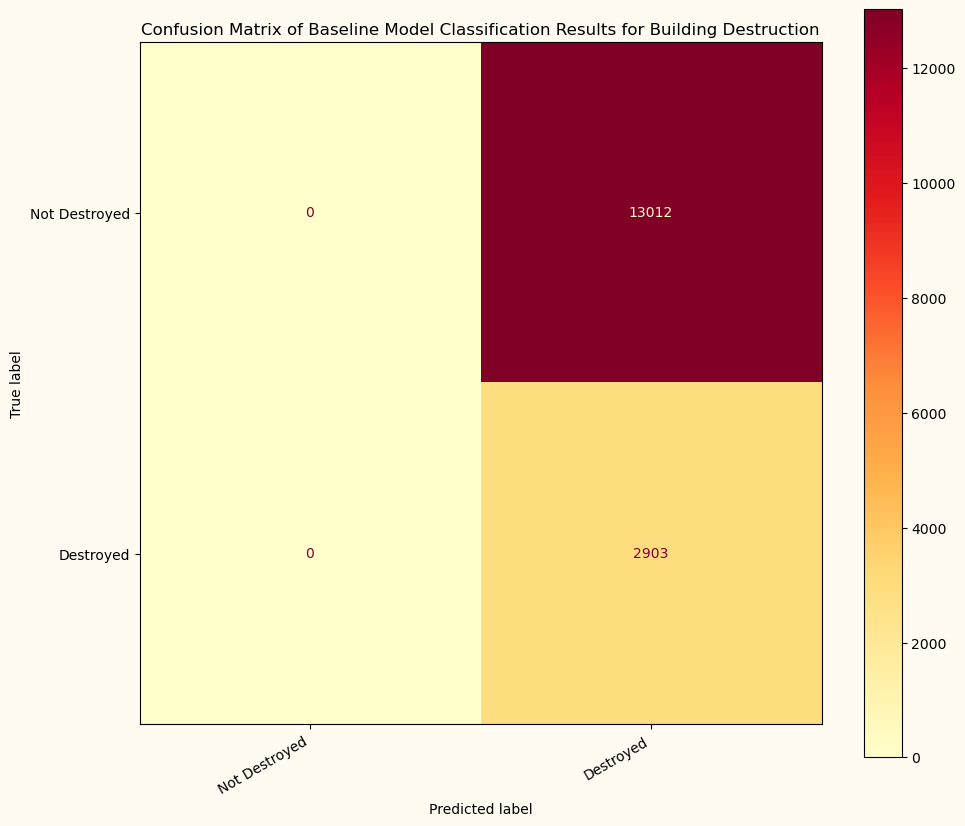

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(11, 11), facecolor = ('#fffbf0'))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.title("Confusion Matrix of Baseline Model Classification Results for Building Destruction")
plt.show()
